In [26]:
import matplotlib.pyplot as plt
import numpy as np
from ND_path_finder.src.data_generators.perlin_generator import PerlinNoiseGenerator

In [27]:
# Initialize the generator with 2D resolution
generator = PerlinNoiseGenerator(res=[100, 100], octv=4, seed=47, time_test=False)

# Generate Perlin noise data
xdataset = generator.perlin_data_xarray()
xdataset

<xarray.Dataset> Size: 42kB
Dimensions:       (x0: 100, x1: 100, coordinates: 2)
Coordinates:
  * x0            (x0) float64 800B 0.0 0.0101 0.0202 ... 0.9798 0.9899 1.0
  * x1            (x1) float64 800B 0.0 0.0101 0.0202 ... 0.9798 0.9899 1.0
  * coordinates   (coordinates) <U2 16B 'x0' 'x1'
Data variables:
    noise_values  (x0, x1) int32 40kB 1 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1
Attributes:
    octaves:     4
    resolution:  [100, 100]
    dimensions:  2

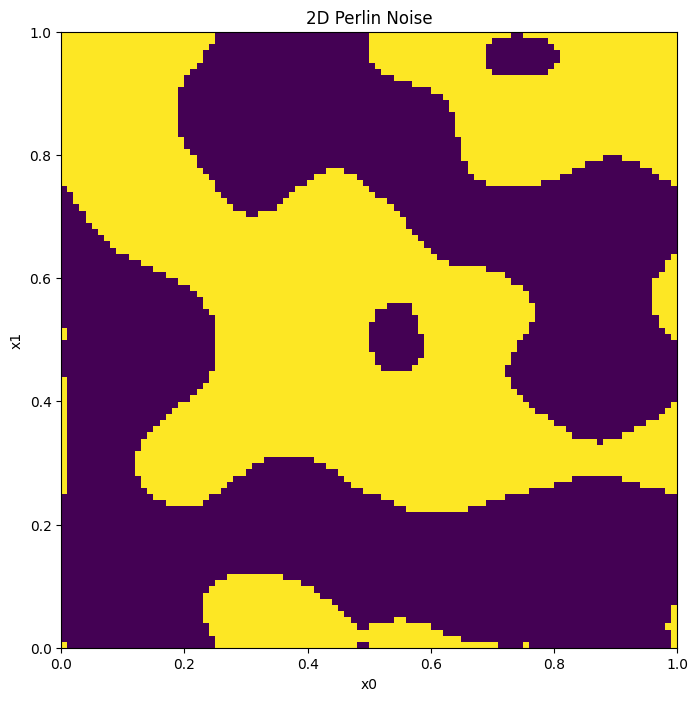

In [28]:
import matplotlib.pyplot as plt

# Plot the 2D Perlin noise values using imshow for a heatmap effect
plt.figure(figsize=(8, 8))
plt.imshow(xdataset['noise_values'], origin='lower', extent=(0, 1, 0, 1), cmap='viridis')
plt.title("2D Perlin Noise")
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()

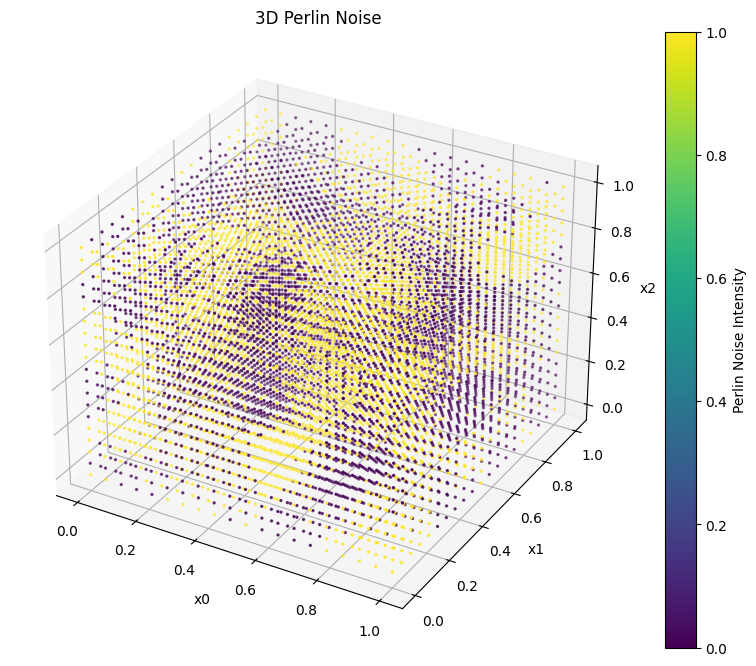

In [29]:
# Initialize the generator with 3D resolution
generator = PerlinNoiseGenerator(res=[20, 20, 20], octv=4, seed=42, time_test=False)

# Generate Perlin noise data
dataset = generator.perlin_data_xarray()
dataset



# Generate a meshgrid for x0, x1, x2 coordinates and flatten them
x0, x1, x2 = np.meshgrid(dataset['x0'].values, dataset['x1'].values, dataset['x2'].values, indexing="ij")
x0_flat = x0.flatten()
x1_flat = x1.flatten()
x2_flat = x2.flatten()

# Flatten the noise_values for color mapping in scatter plot
noise_values_flat = dataset['noise_values'].values.flatten()

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with noise values as colors
sc = ax.scatter(x0_flat, x1_flat, x2_flat, c=noise_values_flat, cmap="viridis", s=2)

# Add color bar and labels
plt.colorbar(sc, label="Perlin Noise Intensity")
ax.set_title("3D Perlin Noise")
ax.set_xlabel("x0")
ax.set_ylabel("x1")
ax.set_zlabel("x2")
plt.show()